In [12]:
!pip install yfinance

In [13]:
import pandas as pd

import yfinance as yf

import numpy as np

import matplotlib.pyplot as plt

ticker = input("Enter the stock ticker symbol: ")

ticker = ticker.upper()

try:

    data = yf.download(ticker, start='2019-01-01', end='2024-10-14')

    if data.empty:

        print("Stock not found or no data available for the given date range.")

    else:
        df = pd.DataFrame(data)

        print(df.head())  # Display the first few rows of the dataframe as a check
        # You can continue with your analysis here...

except Exception as e:
    print(f"An error occurred: {e}")

Enter the stock ticker symbol: kbank.bk


[*********************100%***********************]  1 of 1 completed

             Open   High    Low  Close   Adj Close   Volume
Date                                                       
2019-01-02  185.0  186.0  184.0  185.0  151.548889  4410900
2019-01-03  186.5  187.0  185.0  186.0  152.368042  4601300
2019-01-04  185.5  186.0  183.5  186.0  152.368042  8782100
2019-01-07  186.0  188.0  185.5  188.0  154.006424  7171800
2019-01-08  187.5  188.0  186.0  186.5  152.777679  4042100


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,185.0,186.0,184.0,185.0,151.548889,4410900
2019-01-03,186.5,187.0,185.0,186.0,152.368042,4601300
2019-01-04,185.5,186.0,183.5,186.0,152.368042,8782100
2019-01-07,186.0,188.0,185.5,188.0,154.006424,7171800
2019-01-08,187.5,188.0,186.0,186.5,152.777679,4042100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1403 entries, 2019-01-02 to 2024-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1403 non-null   float64
 1   High       1403 non-null   float64
 2   Low        1403 non-null   float64
 3   Close      1403 non-null   float64
 4   Adj Close  1403 non-null   float64
 5   Volume     1403 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 76.7 KB


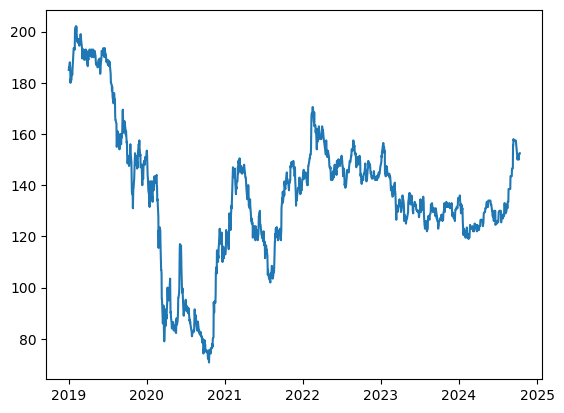

In [16]:
plt.plot(df['Close'])

plt.show()

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,185.0,186.0,184.0,185.0,151.548889,4410900
2019-01-03,186.5,187.0,185.0,186.0,152.368042,4601300
2019-01-04,185.5,186.0,183.5,186.0,152.368042,8782100
2019-01-07,186.0,188.0,185.5,188.0,154.006424,7171800
2019-01-08,187.5,188.0,186.0,186.5,152.777679,4042100


In [18]:
!pip install statsmodels

In [19]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.6 MB/s eta 0:00:00


Missing values in dataset:
105


<ipython-input-20-fb5a70608e92>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'ffill')  # Fill by previous value


ADF Statistic: -2.0912617493972294
p-value: 0.2480427822438387
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6808.753, Time=10.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6803.779, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6805.705, Time=1.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6805.707, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6801.910, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6807.684, Time=2.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 16.942 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1508
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3399.955
Date:                Sat, 26 Oct 2024   AIC                           6801.910
Time:                        06:35:04   BIC                           6807.228
Sample:                 

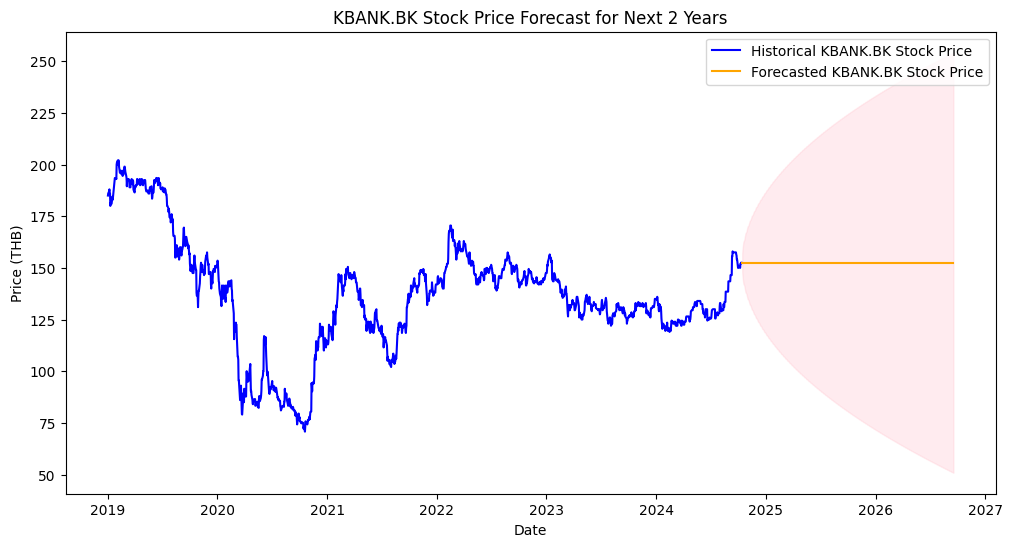

In [20]:
from pmdarima import auto_arima

from statsmodels.tsa.stattools import adfuller

df = df['Close']

df = df.asfreq('B') # set business day

# Check for missing values
print("Missing values in dataset:")

print(df.isnull().sum())

# Handle missing values
df = df.fillna(method = 'ffill')  # Fill by previous value

# Step 4: Check for Stationarity
result = adfuller(df)

print(f'ADF Statistic: {result[0]}')

print(f'p-value: {result[1]}')

# Step 5: Fit the Auto ARIMA Model
model = auto_arima(df, seasonal = False, stepwise = True, trace = True)

print(model.summary())

# Step 6: Forecast the Next Two Years
forecast_steps = 504

forecast, conf_int = model.predict(n_periods = forecast_steps, return_conf_int = True)

forecast_index = pd.date_range(start = df.index[-1] + pd.Timedelta(days = 1), periods = forecast_steps, freq = 'B')

forecast_series = pd.Series(forecast, index = forecast_index)

# Step 7: Plot the Forecast with Confidence Intervals

plt.figure(figsize = (12, 6))

plt.plot(df, label = f"Historical {ticker} Stock Price", color = 'blue')

plt.plot(forecast_series, label = f"Forecasted {ticker} Stock Price", color = 'orange')

plt.fill_between(forecast_series.index, conf_int[:, 0], conf_int[:, 1], color = 'pink', alpha = 0.3) # add interval

plt.title(f"{ticker} Stock Price Forecast for Next 2 Years")

plt.xlabel('Date')

plt.ylabel('Price (THB)')

plt.legend()

plt.show()